# Lecture 17: Conditionals, Iterations and writing Functions in R
<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will understand:**
* Conditional statements: `if/else`
* how to write functions in R
* Iteration: `for`/`while` loops.


</div>

This corresponds to Chapter 26/27 of your book





In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Conditional execution

Often when writing functions we need to do different things depending on what data is passed in. This is known as conditional execution, and is accomplished using the if and/or else construct:

```
if (condition) {
  # code executed when condition is TRUE
} else {
  # code executed when condition is FALSE
}
```

#### if statements

The workhorse for conditional execution in `R` is the if statement.


In [76]:
if (TRUE) {  # this condition is hard-coded to TRUE and will always execute the if-block
  print('do something if true')
}

[1] "do something if true"


In [75]:
x = 10
if(x > 2){
  print(x)
}

[1] 10


## Optional `else` block

Use an else to control the flow without separately checking the condition’s negation:



In [77]:
if ((2 + 2) == 5 ) {
  print('the statement is true')
} else {
  print('the statement is false')
}

[1] "the statement is false"


### `ifelse` function

This is not new to you. `ifelse()` is a function that takes three vector arguments and returns a new vector. As you can see this is not the same as above

In [78]:
# Define a vector
x <- c(1, 2, 3, 4, 5)

# Use ifelse to create a new vector
y <- ifelse(x > 3, "large", "small")

y

[1] "small" "small" "small" "large" "large"

# What about if_else?

`if_else` comes from dplyr and works the same as `ifelse` except the output from the `if_else` should be of the same type

In [81]:
y <- if_else(x > 3, "large", 'small')
y

[1] "0"     "0"     "0"     "large" "large"

### if-else chain

For more complex cases, you may want to check multiple conditions:

In [82]:
a = -1
b = 1

if (a * b > 0) {
  print('Zero is not between a and b')
} else if ( a < b ) {
    smaller = a
    larger = b
} else {
    smaller = b
    larger  = a
}

c(smaller, larger)

[1] -1  1

# Function
Function is not new to us, we have been using `functions` right from day 1. 

`print`, `filter`, `tibble` - are all functions. 

Try 

`class(print)`

Today we will learn to write our own functions

In [83]:
class(print)

[1] "function"

### Why write out your own functions??

Often when programming we find ourselves repeating the same block of code with minor modifications. 

Let us start with simple examples. When building machine learning models (which you will learn next week) it is common practice to normalize all the column values to the same scale; typically between 0 and 1. Let us take the `mpg` dataset and see `hwy` column's min and max values:

In [ ]:
mpg$hwy %>% range

[1] 12 44

Let us now normalize it. `x - min(x) / max(x) - min(x)`

In [98]:
hwy_a <- (mpg$hwy - min(mpg$hwy, na.rm = TRUE)) / (max(mpg$hwy, na.rm = TRUE) - min(mpg$hwy, na.rm = TRUE))
hwy_a %>% range

[1] 0 1

We need to do the exact same for all columns; to begin with let us do for all numerical columns. And it is easy to copy and paste the same code from above and change the variable names

In [ ]:
cty_a <- (mpg$cty - min(mpg$cty, na.rm = TRUE)) / (max(mpg$cty, na.rm = TRUE) - min(mpg$hwy, na.rm = TRUE))
cty_a %>% range

[1] 0.000000 1.130435

🤔 Quiz

Why is the range not showing a maximum of 1?

* A. For the `cty` values it cannot have a maximum value of 1
* B. The numerator should use `max` function
* C. Copy-paste technique not done correctly is the reason for a `flaw` in the formula

We still need to do the exact same procedure for all other columns as well and so intead of repeating ourselves we can introduce a function to do the repeats.

In [ ]:
rescale <- function(x){
  ...
}
rescale(mpg$hwy) %>% range
rescale(mpg$cyl) %>% range

## Anatomy of a function
To write a function we should first think about the inputs and output. A function takes input(s), does something(s) to them, and then returns an output.



🤔 Quiz

What is the output of our rescale function?

* A. x
* B. nothing
* C. rescaled vector values


In R, it is not necessary to use a `return` keyword to specify the return value of a function. The return value of a function is simply the value of the last expression evaluated within the function body. 

### Multiple return example


This function returns 'fizz' if the given number is a multiple of 3. 'buzz' if it is a multiple of 5. If neither a multiple of 3 or 5, it simply returns the given number

In [87]:
fizzbuzz <- function(x){
    ...
}

fizzbuzz(5)

[1] "buzz"


### Arguments

Functions will often have multiple arguments. Some arguments have default values, others do not. All arguments without default values must be passed to a function. Arguments can be passed by name or position. For instance, 




In [11]:
# generate 5 numbers from a Normal(0, 1) distribution.
w = rnorm(5, mean = 0, sd = 1)
x = rnorm(n = 5, mean = 0, sd = 1)
y = rnorm(5, 0, 1)
z = rnorm(5)
round(cbind(w, x, y, z), 1)

w,x,y,z
0.5,1.0,0.1,-0.6
-0.5,1.2,-2.3,0.8
-0.3,0.6,-1.2,1.7
-1.5,-0.5,1.0,0.7
1.1,-0.2,0.4,-0.5


Arguments passed by name need not be in order:

In [120]:
w = rnorm(mean = 0, sd = 1, n = 5)
u = rnorm(mean = 0, sd = 1, 5) # This also works but is bad style. 
round(rbind(u = u, w = w), 1)

# unnamed arguments get passed to the first argument after the names arguments are assigned

u,0.3,0.2,-0.3,0.3,1.6
w,-0.1,0.3,-0.7,-0.2,1.7


# z-score function

Let us create a function to compute z-scores of a vector v; `v - mean(v) / std(v)`

In [13]:
# function to compute z-scores
z_score1 <- function(x) {
      #inputs: x - a numeric vector
      #outputs: the z-scores for x

}

result <- z_score1(c(10,11,23))
result

[1] -0.6450859 -0.5068532  1.1519392

The return statement is not strictly necessary, but can make complex functions more readable. It is good practice to avoid creating intermediate objects to store values only used once.



### Default Parameters

We can set default values for parameters using the construction `parameter = xx` in the function definition.




In [89]:
# function to compute z-scores
z_score2 = function(x, na.rm = T){
  (x - mean(x, na.rm = na.rm)) / sd(x, na.rm = na.rm)
}

Let us pick 10 random numbers between 1 and 100

In [9]:
s1 = sample(1:100, 10)|
s1

[1] 99 76 84 98 29 24 41 44 67 94

In [90]:
s2 = c(s1, NA)

z_score1(s2)
z_score2(s2)

[1] NA NA NA NA NA NA NA NA NA NA NA

[1]  1.15222661  0.35877715  0.63475957  1.11772880 -1.26261957 -1.43510859
 [7] -0.84864594 -0.74515254  0.04829692  0.97973759          NA

### Exercise
Write an R function called `find_missing_elements` that takes these two vectors, v1, v2 as input and returns a vector containing elements that are present in v1 but not in v2

In [ ]:
find_missing_elements = ...

v1 <- c(1, 2, 3, 4, 5)
v2 <- c(3, 4, 6, 7)

find_missing_elements(v1, v2)

## Iteration
 

If you're coming from a C++ or Java background, your first instinct is probably to use a `for()` loop. In R, for loops look like this:
```{r}
for (<index> in <vector>) {
    [do something for each value of <index>]
}
```

In [18]:
x = sample(1:100, 10, replace = F)
print(x)
for (item in x){
  print(item)
}

 [1] 95 68 25 45 98 75 82 37 23 20
[1] 95
[1] 68
[1] 25
[1] 45
[1] 98
[1] 75
[1] 82
[1] 37
[1] 23
[1] 20


## `while`

The last kind of loop we will consider is `while()`. 

A while statement can be useful when you aren’t sure how many iterations are needed. This happens sometimes in statistics or data science when you are simulating a random quantity. 

Here is an example that takes a random walk and terminates if the value is more than 10 units from 0.

## Example: random walk
A random walk is a 

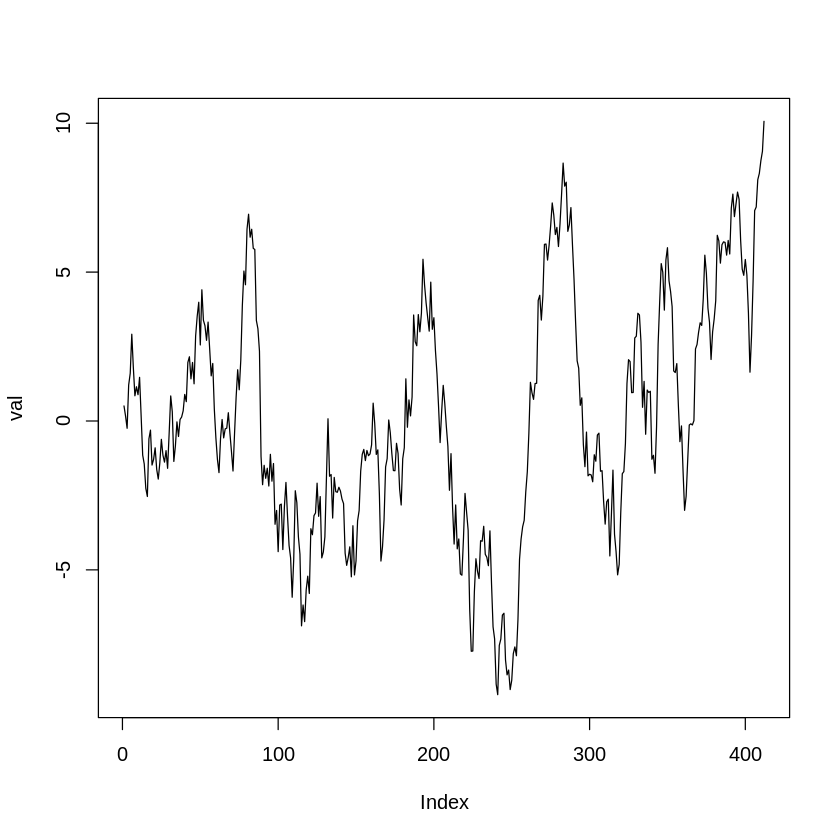

In [25]:
maxIter = 1e3 # always limit the total iterations allowed
val = c()
val[1] = rnorm(1) ## initialize

k = 1
while (abs(val[k]) < 10 && k <= maxIter) {
  val[k + 1] = val[k] + rnorm(1)
  k = k + 1
}
val = val[1:k]

plot(val, type = 'l')

#### key words
The following key words are useful within loops:

- break - break out of the currently executing loop
- next - move to the next iteration immediately, without executing the rest of this iteration (continue in other languages such as C++)

Here is an example using next:

In [26]:
for (i in 1:10 ) {
  if (i %% 2 == 0) next
  cat(i,'\n')
}

1 
3 
5 
7 
9 


`break` example

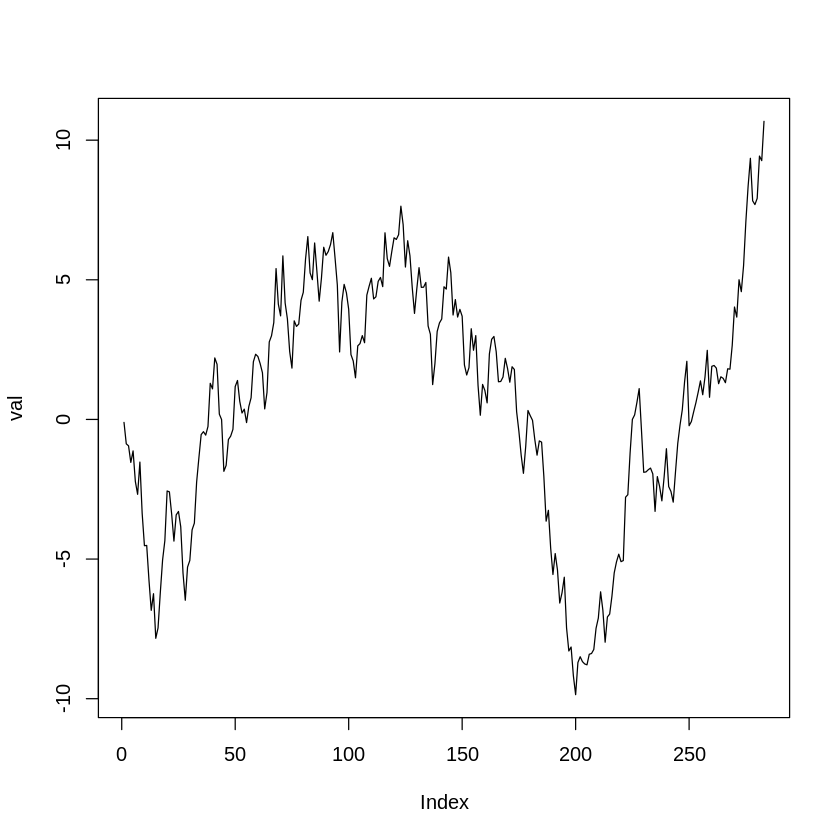

In [93]:
maxIter = 1e3 # always limit the total iterations allowed
val = c()
val[1] = rnorm(1) ## initialize

k = 1
while (k <= maxIter) {
  val[k + 1] = val[k] + rnorm(1)
  k = k + 1
  if(abs(val[k]) > 10)
      break
}
val = val[1:k]

plot(val, type = 'l')

## Applying same functions across multiple columns of dataframe
Very often in programming, it happens that you need to perform the same "action" on multiple "things". Examples we have already seen in this class:
- `facet_wrap()`, `facet_grid()`: make the same plot for various combinations of factors.
- `group_by()` + `summarize()`: compute the same statistic for various groups of data.



### Performing the same action on multiple columns
Consider the following table with four columns `a`-`d`:

In [95]:
df <- tibble(
  a = rnorm(10),
  b = rnorm(10),
  c = rnorm(10),
  d = rnorm(10)
)
df

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
0.3639825,0.2793999,0.75416291,2.01025394
-0.1702943,-0.5908596,-0.14913645,-1.28492751
-0.4104605,0.1788368,-0.75772881,-0.03415758
-0.2826906,0.7444509,-0.37238919,-1.64364691
-1.0533577,1.6824327,0.90337647,0.13716963
-2.8917004,0.6222882,0.09402692,0.93657431
1.0431000,0.1721396,-1.53884170,-1.24873533
0.2759381,1.7421926,1.39494977,0.74774049
1.6680250,0.6707317,-1.56428548,0.01547681


Using the z-score example above multiple times

In [96]:
# mutate the manual way. Your numbers would be different due to randomness
df %>% mutate(a = z_score2(a),
b = z_score2(b),
c = z_score2(c),
d = z_score2(d))

df %>% print

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
0.3096027,-0.1495548,0.8563618,1.82427427
-0.1039729,-1.0878789,-0.0533940,-1.10418793
-0.2898818,-0.2579832,-0.6663364,0.00738438
-0.1909771,0.3518686,-0.2782425,-1.42298561
-0.7875387,1.3632117,1.0066419,0.15964467
-2.2105717,0.2201514,0.1915074,0.87008396
0.8352972,-0.2652041,-1.4530324,-1.07202356
0.2414489,1.4276456,1.5017288,0.70226536
1.3190421,0.2723837,-1.4786581,0.05149498


# A tibble: 10 × 4
        a      b       c       d
    <dbl>  <dbl>   <dbl>   <dbl>
 1  0.364  0.279  0.754   2.01  
 2 -0.170 -0.591 -0.149  -1.28  
 3 -0.410  0.179 -0.758  -0.0342
 4 -0.283  0.744 -0.372  -1.64  
 5 -1.05   1.68   0.903   0.137 
 6 -2.89   0.622  0.0940  0.937 
 7  1.04   0.172 -1.54   -1.25  
 8  0.276  1.74   1.39    0.748 
 9  1.67   0.671 -1.56    0.0155
10  1.10  -1.32   0.275  -0.0604


In the preceding example, we just copy-pasted the same bit of code four times. From now on, we shall adopt a rule: "never copy-paste more than twice!" If you find yourself copy-pasting code more than two times, it pays to think of a better way to accomplish the task at hand.

### `across()`
The better way in this case is to use a new `dplyr` verb called `across()`. Of course, we have used this earlier. Here is an example

In [98]:
# use across instead
df %>% mutate(across(everything(), z_score2)) %>% print

# A tibble: 10 × 4
        a      b       c        d
    <dbl>  <dbl>   <dbl>    <dbl>
 1  0.310 -0.150  0.856   1.82   
 2 -0.104 -1.09  -0.0534 -1.10   
 3 -0.290 -0.258 -0.666   0.00738
 4 -0.191  0.352 -0.278  -1.42   
 5 -0.788  1.36   1.01    0.160  
 6 -2.21   0.220  0.192   0.870  
 7  0.835 -0.265 -1.45   -1.07   
 8  0.241  1.43   1.50    0.702  
 9  1.32   0.272 -1.48    0.0515 
10  0.878 -1.87   0.373  -0.0160 


The columns selected by `across()` work in the same way as `select`:

In [99]:
# standardize everything except column a, then compute the mean

df %>% mutate(across(b:d, z_score2)) %>% 
  summarise(across(everything(), mean))

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
-0.03597716,2.775558e-17,-3.193517e-17,1.828388e-17


In [37]:
# standardize only the numerical columns
mpg %>% mutate(across(where(is.numeric), z_score3)) %>% print

# A tibble: 234 × 11
   manufacturer model  displ   year     cyl trans drv      cty   hwy fl    class
   <chr>        <chr>  <dbl>  <dbl>   <dbl> <chr> <chr>  <dbl> <dbl> <chr> <chr>
 1 audi         a4    -1.29  -0.998 -1.17   auto… f      0.268 0.934 p     comp…
 2 audi         a4    -1.29  -0.998 -1.17   manu… f      0.973 0.934 p     comp…
 3 audi         a4    -1.14   0.998 -1.17   manu… f      0.738 1.27  p     comp…
 4 audi         a4    -1.14   0.998 -1.17   auto… f      0.973 1.10  p     comp…
 5 audi         a4    -0.520 -0.998  0.0689 auto… f     -0.202 0.430 p     comp…
 6 audi         a4    -0.520 -0.998  0.0689 manu… f      0.268 0.430 p     comp…
 7 audi         a4    -0.288  0.998  0.0689 auto… f      0.268 0.598 p     comp…
 8 audi         a4 q… -1.29  -0.998 -1.17   manu… 4      0.268 0.430 p     comp…
 9 audi         a4 q… -1.29  -0.998 -1.17   auto… 4     -0.202 0.262 p     comp…
10 audi         a4 q… -1.14   0.998 -1.17   manu… 4      0.738 0.766 p     comp…
# ℹ 224

using `sapply`

In [107]:
mpg %>% select(where(is.numeric)) %>% sapply(mean)

displ        year         cyl         cty         hwy 
   3.471795 2003.500000    5.888889   16.858974   23.440171

`summarize` also gets the same result

In [106]:
mpg %>% select(where(is.numeric)) %>% summarize(displ_m = mean(.$displ), cyl_m = mean(cyl))

displ_m,cyl_m
<dbl>,<dbl>
3.471795,5.888889


## Dataframe functions

A case of a problem of `indirection`, as `dplyr` uses `tidy evaluation` to allow you to refer to the names of variables inside your data frame without any special treatment.

In [109]:
grouped_mean <- function(df, group_var, mean_var) {
  df %>% 
    group_by(group_var) %>%
    summarize(mean(mean_var))
}

grouped_mean(mpg, model, hwy)

ERROR: [1m[33mError[39m in `group_by()`:[22m
[1m[22m[33m![39m Must group by variables found in `.data`.
[31m✖[39m Column `group_var` is not found.


In [ ]:
mpg %>% group_by(model) %>% summarise(mean(hwy))

model,mean(hwy)
<chr>,<dbl>
4runner 4wd,18.83333
a4,28.28571
a4 quattro,25.75000
a6 quattro,24.00000
altima,28.66667
c1500 suburban 2wd,17.80000


### Fix with embracing `{{ }}`

In [ ]:
grouped_mean <- function(df, group_var, mean_var) {
  df %>% 
    group_by(group_var) |> 
    summarize(mean(mean_var))
}

grouped_mean(mpg, model, hwy) %>% head

### When to embrace?🤔

There are two terms to look for in the docs which correspond to the two most common sub-types of tidy evaluation:

* Data-masking: this is used in functions like arrange(), filter(), and summarize() that compute with variables.

* Tidy-selection: this is used for functions like select(), relocate(), and rename() that select variables.

## Pick function

Applied for verbs that use data-masking when sub-selecting the columns

In [ ]:
mean_hwy <- function(df, var1, var2, var_3) {
  df |> 
    group_by({{ var1 }}, {{ var2 }}) |> 
    summarize(
      mean = mean(is.na({{ var_3 }})),
      .groups = "drop"
    )
}

mpg |> 
  mean_hwy(manufacturer, model, hwy) %>% head

manufacturer,model,mean
<chr>,<chr>,<dbl>
audi,a4,0
audi,a4 quattro,0
audi,a6 quattro,0
chevrolet,c1500 suburban 2wd,0
chevrolet,corvette,0
chevrolet,k1500 tahoe 4wd,0


## Using pick

In [ ]:
mean_hwy <- function(df, var1, var2) {
  df |> 
    group_by(pick({{ var1 }})) |> 
    summarize(
      mean = mean(is.na({{ var2 }})),
      .groups = "drop"
    )
}

mpg |> 
  mean_hwy(c(manufacturer, model), hwy) %>% head

manufacturer,model,mean
<chr>,<chr>,<dbl>
audi,a4,0
audi,a4 quattro,0
audi,a6 quattro,0
chevrolet,c1500 suburban 2wd,0
chevrolet,corvette,0
chevrolet,k1500 tahoe 4wd,0




## What is refactoring?

In software, it is customary to first get 'a' solution for a problem.  Once you have a working software, you should always think through it and see if there are opportunities to make things better. That step is called refactoring!
Invariably every time you relook at your code, you will find opportunities to make things better. Some of the things that stand out are
* Code that is repeating - pull them over to a function
* Renaming your variables to make it more meaningful so that a third person who looks at your code can understand what you are trying to do (sometimes it helps you to recollect what you were doing, when you revisit your code after a few months)
* See if there are other builtin functions that you replace your code with 

These are only some tips, to get you started in the refactoring path. However, attempting to write the best code possible to begin with itself could take you into an analysis-paralysis mode. So the first step always is to get it working in some form and then think of refactoring. However, as you gain experience, you will apply the correct methods itself on your first attempt.
But in any case writing code itself is an iterating process